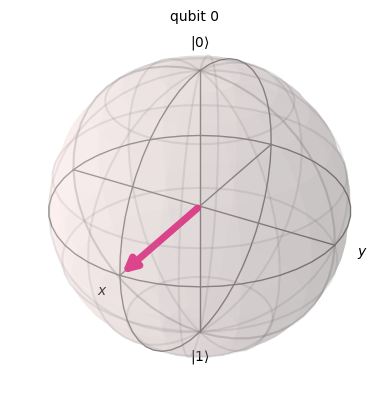

In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import numpy as np
 

state = Statevector([1/np.sqrt(2), 1/np.sqrt(2)])
plot_bloch_multivector(state)



# Állapotok a Bloch gömbön

Vizsgálja meg hogyan jelennek meg egyes állpotok a gömbön. Ehhez vegyen fel legalább 4 állapotot, melyek közül az első kettő a |0> és |1> legyen. (Ajánlott további állapotok még, ahol alpha és beta egyenlőek, valamint legalább egy teljesen szabadon választott.). Hogyan jelenik meg a gömbön, ha két állapot ortogonális? 

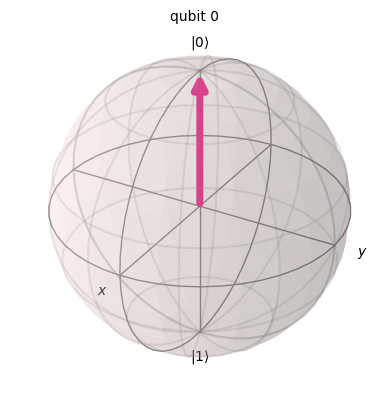

In [2]:
#quantum circuit
qc = QuantumCircuit(1,1) # 1 kvantum és 1 klasszikus bit (1 klasszikus bit a későbbi mérési eredmények tárolására kell)
#alapértelmezetten a |0> állapotban inicializálódnak az egyes qubitek
#kvantum kapuk
qc.initialize([1/np.sqrt(2), 1/np.sqrt(2)], 0) #inicializáljük az első qubitet |+>- ként, a másodikat |0>-ként
#különböző kapuk
qc.h(0)
qc.x(0)
qc.y(0)
qc.z(0)

#fázisforgató kapu
theta = np.pi
qc.p(theta, 0)

#bloch visualization
state = Statevector(qc)
plot_bloch_multivector(state)

# Műveletek a Bloch gömbön

X,Y,Z kapuk vizsgálata: Milyen műveletet hajtanak végre a gömbön ezen a kapuk, vajon miért éppen az a nevük ami? H kapu vizsgálata: Mit csinál a H kapu? Igazoljuk, hogy HXH=Z.

/opt/conda/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


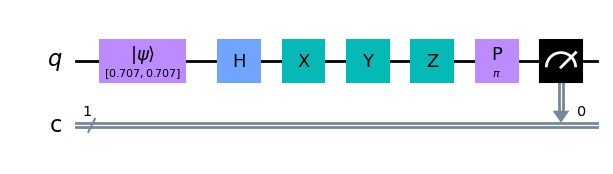

In [3]:
#mérés
qc.measure(range(1),range(1)) #mely qubiteken végezzünk mérést és azok eredményeit hova írjuk
qc.draw() #ellenőrzésként a hálózat lerajzoltatható

In [4]:
from qiskit_aer import Aer
from qiskit import transpile

#szimulátor kijelölse
backend = Aer.get_backend('qasm_simulator')
job_sim = backend.run(transpile(qc, backend), shots=1000) # 1000-szer ismételjük meg a kísérletet, hogy statisztikát kapjunk és elvégezzük a mérést

result_sim = job_sim.result() 

counts = result_sim.get_counts()
print(counts) #mérési eredmények kiírása

{'0': 1000}


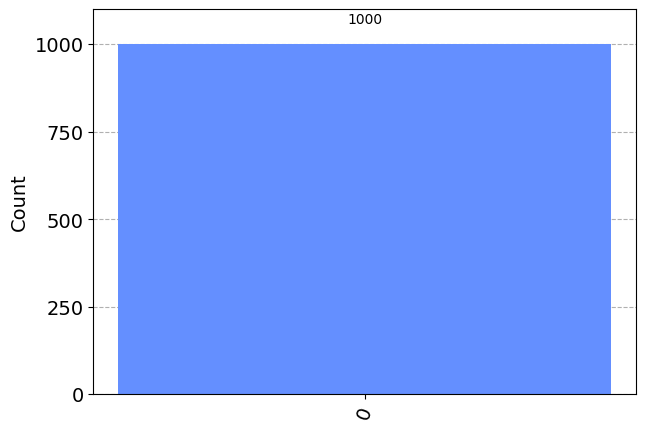

In [5]:
from qiskit.visualization import plot_histogram

#hisztogram a mérési eredményekből
plot_histogram(counts)

# Qubit mérése
Milyen régió tartozik a gömbön egy bizonyos mérési eredményhez (pl.: 50-50\% hogy 1-et vagy 0-át mérek)? Mi a mérés utáni állapot? Mi a mérés utáni állapot többszörös mérés után?

# Mérés más bázisban
Valósítson meg mérést |+>, |-> bázisban! Milyen régió tartozik a gömbön egy bizonyos mérési eredményhez? Mi a mérés utáni állapot?

# Tetszőleges állapot előkészítése
Vizsgálja meg a P fázisforgató kapu működését!. Hozzon létre segítségével tetszőleges egybites kvantum állapot előkészítésére alkalmas hálózatot!